In [1]:
from length_leaf import *
import numpy as np

Using TensorFlow backend.


In [2]:
data = np.load('LeafCounting/data/dataset_folder_5.npz', allow_pickle=True)

In [3]:
x = data['arr_0']

In [4]:
x.shape

(74, 240, 240, 3)

In [5]:
find_centroid(x[20])

(149, 128)

In [6]:
import matplotlib.pyplot as plt

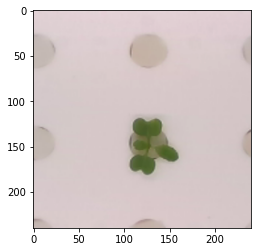

In [7]:
plt.imshow(x[20])

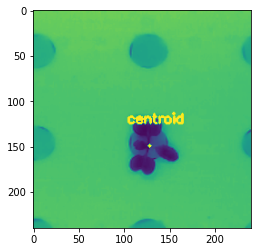

In [8]:
draw_centroid(x[20])

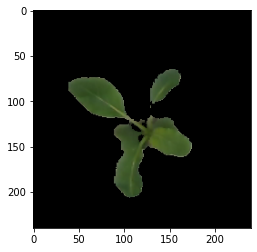

In [9]:
output,mask = extract_leaf(x[10])
plt.imshow(output)

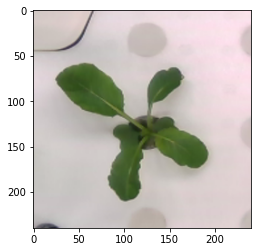

In [10]:
plt.imshow(x[12])

In [11]:
calculate_max_length_leaf(x[23])

49.76946855251722

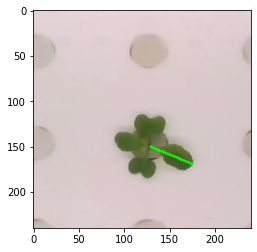

In [12]:
draw_centroid2tip(x[23])

In [13]:
test = load_image("C:/Users/Admin/Desktop/Thesis/ModelResults/Model v1/model.png", default_size)

In [14]:
draw_length_leaf("C:/Users/Admin/Desktop/Thesis/ModelResults/Model v1/model.png")

Invalid image!


In [15]:
draw_centroid(test)

Invalid image!


In [16]:
calculate_max_length_leaf(test)

0

In [17]:
length_leaf("C:/Users/Admin/Desktop/Thesis/ModelResults/Model v1/model.png")

0

In [18]:
centroid = find_centroid(x[20])

In [19]:
contours_pixels = find_contours(x[20])

In [20]:
centroid

(149, 128)

In [21]:
len(contours_pixels)

277

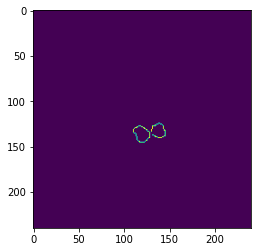

In [22]:
leaf_image, leaf_mask = extract_leaf(x[0])
edges = cv2.Canny(leaf_mask, 100, 1200)
plt.imshow(edges)

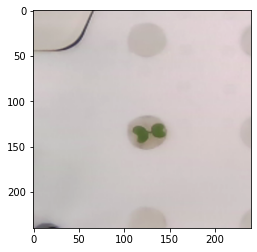

In [23]:
plt.imshow(x[0])

In [24]:
index = 20
test = x[index].copy()
leaf_image, leaf_mask = extract_leaf(x[index])
centroid = find_centroid(x[index])
image = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(leaf_mask, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [25]:
index = 20
centroid = find_centroid(x[index])
contours = find_external_contours(x[index])
contours = find_good_contours(contours, 10)

In [26]:
def draw_point(np_image, point):
    cv2.circle(np_image, tuple(point), 1, (0, 255, 0), -1)   

In [27]:
test = x[index].copy()
for point in contours[0]:
    draw_point(test, point[0])

In [28]:
import math
lengths = []
for contour in contours:
    lengths_of_contour = []
    for pixel in contour:
        point = tuple(pixel[0])
        length = math.sqrt((centroid[1] - point[0])**2 + (centroid[0] - point[1])**2)
        lengths_of_contour.append(length)
    
    lengths.append(lengths_of_contour)

In [29]:
max(lengths[0])

33.61547262794322

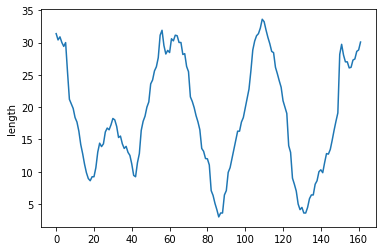

In [30]:
plt.plot(lengths[0])
plt.ylabel('length')
plt.show()

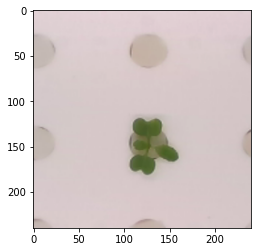

In [46]:
plt.imshow(x[index])

In [31]:
calculate_max_length_leaf(x[index])

34.0147027033899

In [32]:
idx = [i for i in range(len(lengths[0]))]

In [48]:
f = np.polynomial.chebyshev.Chebyshev.fit(idx, lengths[0],30)

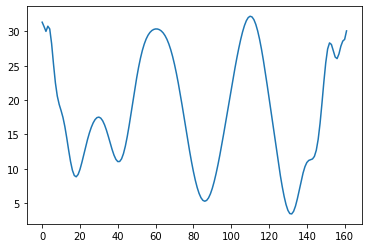

In [49]:
plt.plot([f(i) for i in idx])

In [35]:
max([f(i) for i in idx])

32.2193090952198

In [36]:
def find_next(f, xs, i):
    if i+1 < len(xs):
        return f(i+1)
    else:
        return f(0)  

In [69]:
def find_prev(f, xs, i):
    if i > 0:
        return f(i-1)
    else:
        return f(len(xs)-1) 

In [70]:
def find_extreme(f, xs):
    extreme_values = []
    extreme_xs = []
    for i in range(len(xs)):
        if f(i) > find_prev(f, xs, i) and f(i) > find_next(f, xs, i):
            extreme_values.append(f(i))
            extreme_xs.append(i)
    return extreme_values, extreme_xs

In [39]:
value, locate = find_extreme(f, idx)

In [40]:
value

[31.35050354800179,
 30.710617986188225,
 30.765559023796513,
 17.52387640758323,
 30.369996883815766,
 32.2193090952198,
 28.335316871596707]

In [41]:
locate

[0, 1, 3, 30, 60, 110, 152]

In [220]:
def calculate_average_length_leaf(np_image, coef_x=1, coef_y=1):
    leaf_image, leaf_mask = extract_leaf(np_image)
    centroid = find_centroid(np_image)
    contours = find_external_contours(np_image)
    contours = find_good_contours(contours, 10)
    
    lengths = []
    for contour in contours:
        lengths_of_contour = []
        for pixel in contour:
            point = tuple(pixel[0])
            length = math.sqrt((coef_x*(centroid[1] - point[0]))**2 + (coef_y*(centroid[0] - point[1]))**2)
            lengths_of_contour.append(length)
        lengths.append(lengths_of_contour)
    
    length_leafs = []
    for length in lengths:
        idx = [i for i in range(len(length))]
        f = np.polynomial.chebyshev.Chebyshev.fit(idx, length, 20)
        value, locate = find_extreme(f, idx)
        length_leafs += [length[i] for i in locate]
        
    length_average = sum(length_leafs)/len(length_leafs)
    return length_average

In [221]:
calculate_average_length_leaf(x[30])

74.86746402240628

In [188]:
np_image = x[30]
leaf_image, leaf_mask = extract_leaf(np_image)
centroid = find_centroid(np_image)
contours = find_external_contours(np_image)
contours = find_good_contours(contours, 10)

In [189]:
len(contours)

1

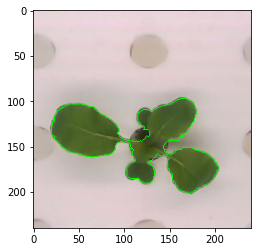

In [190]:
test = np_image.copy()
plt.imshow(cv2.drawContours(test, contours, -1, (0,255,0)))

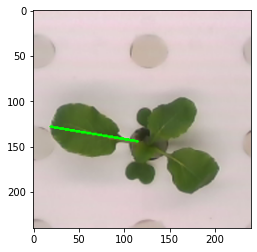

In [205]:
draw_centroid2tip(np_image)

In [191]:
coef_x = 1
coef_y = 1
lengths = []
for contour in contours:
    lengths_of_contour = []
    for pixel in contour:
        point = tuple(pixel[0])
        length = math.sqrt((coef_x*(centroid[1] - point[0]))**2 + (coef_y*(centroid[0] - point[1]))**2)
        lengths_of_contour.append(length)
    lengths.append(lengths_of_contour)

In [192]:
length_leafs = []
for length in lengths:
    idx = [i for i in range(len(length))]
    f = np.polynomial.chebyshev.Chebyshev.fit(idx, length,20)
    value, locate = find_extreme(f, idx)
    length_leafs += [length[i] for i in locate]

In [193]:
length_leafs

[95.34149149242423,
 42.04759208325728,
 92.61209424259879,
 73.49829930005184,
 70.83784299369935]

In [194]:
locate

[111, 200, 265, 374, 382]

In [197]:
calculate_max_length_leaf(x[30])

97.32420048477151

In [201]:
max(lengths[0])

96.5090669315583

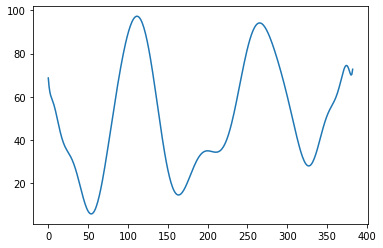

In [202]:
plt.plot([f(i) for i in idx])

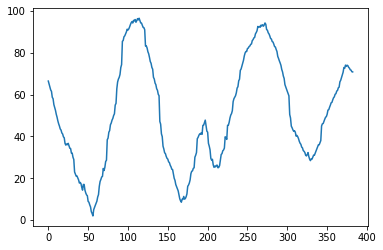

In [203]:
plt.plot(lengths[0])

In [212]:
contours[0][382]

array([[168,  97]], dtype=int32)